In [82]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('clean_data.csv')
df.head()

,time,Convert_time,DATES,TIME,DAY,YEAR,MONTH,DATE,HOUR,MIN,SEC,latitude,longitude,svr1,svr2,svr3,svr4,upload_transfer_size_mbytes,upload_bitrate_mbits/sec,download_transfer_size_rx_mbytes,download_bitrate_rx_mbits/sec,application_data,square_id
0,1656877417,2022-07-04 05:43:37,2022-07-04,05:43:37,Monday,2022,7,4,5,43,37,-37.712603,144.859029,23.0,24.4,28.4,49.8,1.91,16.10,0.840820,7.06,0.005067,square_111669149772
1,1656877418,2022-07-04 05:43:38,2022-07-04,05:43:38,Monday,2022,7,4,5,43,38,-37.712627,144.859119,43.2,47.0,44.0,55.2,1.85,15.50,0.864258,7.25,0.005664,square_111669149772
2,1656877419,2022-07-04 05:43:39,2022-07-04,05:43:39,Monday,2022,7,4,5,43,39,-37.712695,144.859188,57.0,54.8,47.2,69.1,1.91,16.10,0.947266,7.95,0.004143,square_111669149772
3,1656877424,2022-07-04 05:43:44,2022-07-04,05:43:44,Monday,2022,7,4,5,43,44,-37.712993,144.859051,27.7,34.8,36.1,44.5,1.11,9.33,1.270000,10.70,0.007172,square_111669149772
4,1656877425,2022-07-04 05:43:45,2022-07-04,05:43:45,Monday,2022,7,4,5,43,45,-37.713143,144.859034,26.0,23.1,21.4,44.4,1.48,12.40,1.690000,14.20,0.004509,square_111669149772


In [39]:
avg_latency = np.mean(df[['svr1', 'svr2', 'svr3', 'svr4']], axis=1)

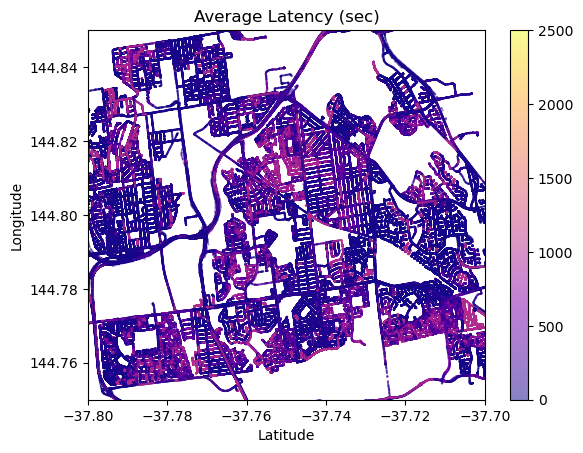

In [55]:
# Create a Scatter plot of the latitude and longitude points, coloured by the average latency
im = plt.scatter(x=df['latitude'],
                 y=df['longitude'],
                 s=0.25,
                 vmin=np.min(avg_latency),
                 vmax=np.max(avg_latency),
                 c=avg_latency,
                 alpha=0.5,
                 cmap=cm.plasma)
plt.colorbar(im)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Average Latency (sec)')
plt.axis([-37.800, -37.700, 144.750, 144.850])
plt.show()

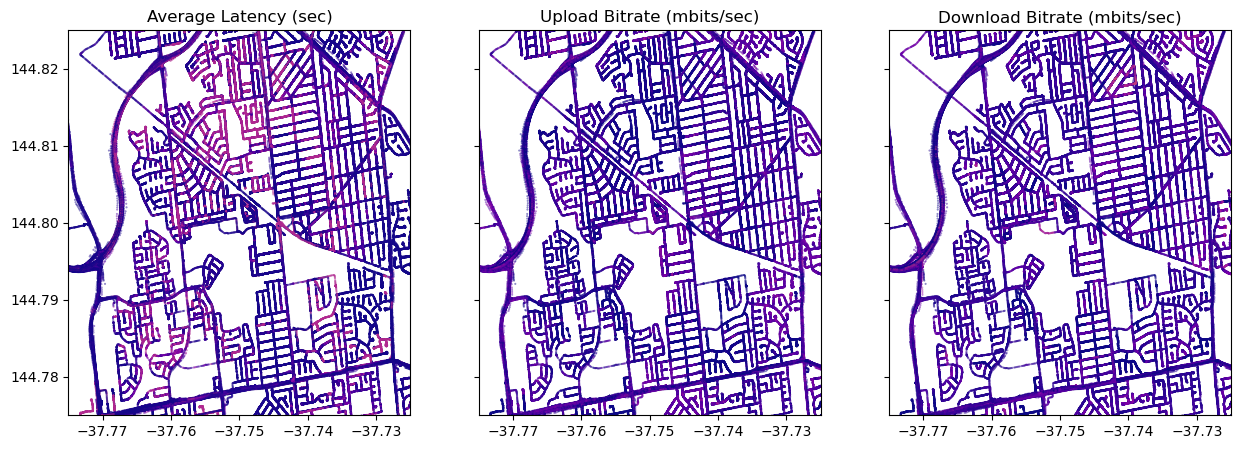

In [70]:
# Create mutliple Scatter plots for latency, upload and download rates
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

features = [
    ('Average Latency (sec)', avg_latency),
    ('Upload Bitrate (mbits/sec)', df['upload_bitrate_mbits/sec']),
    ('Download Bitrate (mbits/sec)', df['download_bitrate_rx_mbits/sec'])
]

for index, feature in enumerate(features):
    title, column = feature
    axis = axs[index]

    axis.scatter(x=df['latitude'],
                 y=df['longitude'],
                 s=0.25,
                 vmin=np.min(column),
                 vmax=np.max(column),
                 c=column,
                 alpha=0.5,
                 cmap=cm.plasma)
    axis.set_title(title)
    axis.set_xlim(-37.775, -37.725)
    axis.set_ylim(144.775, 144.825)

plt.show()

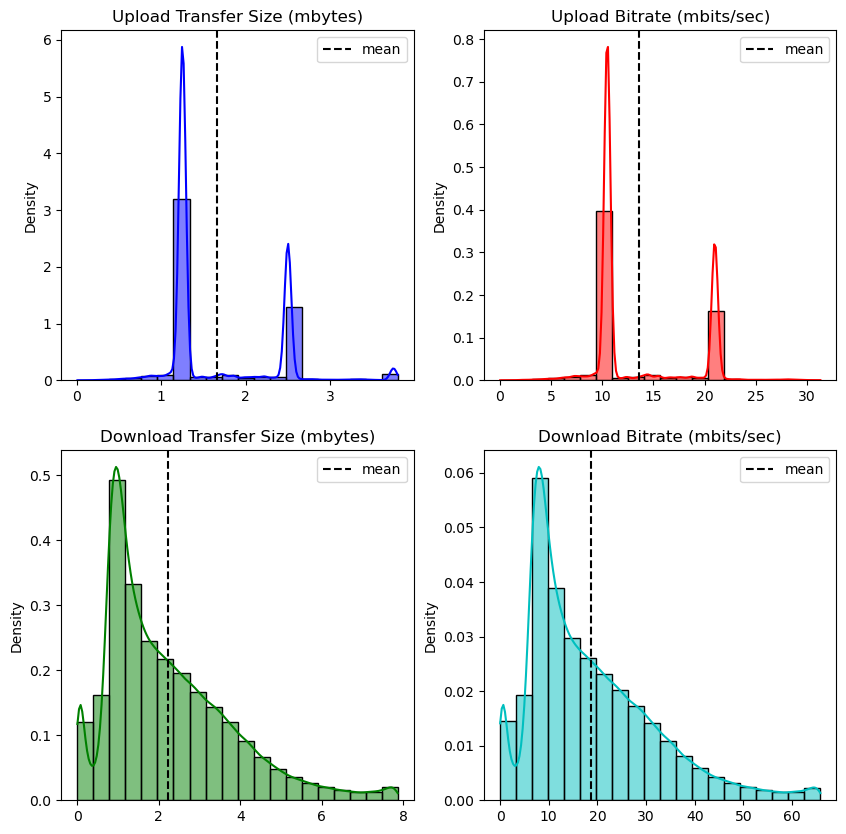

In [88]:
features = [
    ('Upload Transfer Size (mbytes)', 'b', df['upload_transfer_size_mbytes']),
    ('Upload Bitrate (mbits/sec)', 'r', df['upload_bitrate_mbits/sec']),
    ('Download Transfer Size (mbytes)', 'g', df['download_transfer_size_rx_mbytes']),
    ('Download Bitrate (mbits/sec)', 'c', df['download_bitrate_rx_mbits/sec'])
]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for axis, feature in zip(axs, features):
    title, color, column = feature

    # Remove outliers
    column = column[column > 0]
    column = column[np.abs(stats.zscore(column)) < 3]

    sns.histplot(column,
                 color=color,
                 kde=True,
                 stat='density',
                 bins=20,
                 ax=axis)
    axis.set_facecolor('w')
    axis.axvline(column.mean(),
                 linestyle='dashed',
                 label='mean',
                 color='k')
    axis.legend(loc='best')
    axis.set_title(title)
    axis.set_xlabel('')

plt.show()